In [4]:
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
data_path = '/home/nelosegui/BIFOLD_work/domain_generalisation/conv_eeg/simpleconv_datasets'
model_path = '/home/nelosegui/BIFOLD_work/domain_generalisation/conv_eeg/results'

## Pairwise wasserstein regularization example

In [5]:
from scripts.scripts import *

p          = [0.2,160,4,70,5]
dict_config = { 
'model':'EEGSimpleConv',
'params':p,
'dataset':'BNCI',
'runs':5,
'n_epochs':50,
'EA':True,
'mixup':True,
'BN':True,
'EOG':False,
'Z':'Z0',
'path':data_path,
'lmso':False,
'session':True,
'reg_subject':True,
'use_wandb':True,
'evaluation':'cross',
'comment':'baseline',
'within':False,
'mdl':False,
'filter':0.5,
'save_model':True,
'save_model_path':model_path + '/BNCI_pair_wass_reg',
'load_model':False,
'preload_reg':False,
'online':False
}    
    
    
X,Y = load_data(dict_config, wass_reg = True)
best_params = dict_config['params']
best_score = train_test(best_params,dict_config, X,Y, wass_reg = True)


Sampling Freq: 250


wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: naima-elosegui (naima-elosegui-technische-universitat-berlin). Use `wandb login --relogin` to force relogin


[0.2, 160, 4, 70, 5, 22, 4, 250, 9] 3326677 params
Split: 0


/home/nelosegui/.local/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/home/nelosegui/.local/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


 49 test: 0.753 
 49 test: 0.715 
 49 test: 0.715 
 49 test: 0.585 
 49 test: 0.753  average: 0.705
Split: 1
 49 test: 0.455 
 49 test: 0.365 
 49 test: 0.293 
 49 test: 0.469 
 49 test: 0.474  average: 0.411
Split: 2
 49 test: 0.778 
 49 test: 0.625 
 49 test: 0.736 
 49 test: 0.689 
 49 test: 0.467  average: 0.659
Split: 3
 49 test: 0.484 
 49 test: 0.512 
 49 test: 0.519 
 49 test: 0.477 
 49 test: 0.557  average: 0.510
Split: 4
 49 test: 0.672 
 49 test: 0.434 
 49 test: 0.597 
 49 test: 0.431 
 49 test: 0.609  average: 0.549
Split: 5
 49 test: 0.479 
 49 test: 0.523 
 49 test: 0.337 
 49 test: 0.439 
 49 test: 0.495  average: 0.455
Split: 6
 49 test: 0.608 
 49 test: 0.639 
 49 test: 0.509 
 49 test: 0.726 
 49 test: 0.517  average: 0.600
Split: 7
 49 test: 0.677 
 49 test: 0.474 
 49 test: 0.688 
 49 test: 0.693 
 49 test: 0.530  average: 0.612
Split: 8
 49 test: 0.694 
 49 test: 0.648 
 49 test: 0.641 
 49 test: 0.582 
 49 test: 0.668  average: 0.647
0.572


number_params,▁
std,▁
std_sub,▁
test_acc,▁
number_params,3326677
std,0.02595
std_sub,0.09258
test_acc,0.5718


## cross subject data example with reg


In [6]:
from scripts.scripts import *

p          = [0.2,160,4,70,5] #0th element corresponds to the temperature parameter for the learning rate
dict_config = { 
'wass_reg':True,
'model':'EEGSimpleConv',
'params':p,
'dataset':'BNCI',
'runs':5,
'n_epochs':50,
'EA':True,
'mixup':True,
'BN':True,
'EOG':False,
'Z':'Z0',
'path':data_path,
'lmso':False,
'session':True,
'reg_subject':True,
'use_wandb':True,
'evaluation':'cross',
'comment':'baseline',
'within':False,
'mdl':False,
'filter':0.5,
'save_model':True,
'save_model_path':'/home/nelosegui/BIFOLD_work/domain_generalisation/conv_eeg/results/BNCI_subj_reg',
'load_model':False,
'preload_reg':False,
'online':False
}    
    
    
X,Y = load_data(dict_config)

[KeOps] Warning : Cuda libraries were not detected on the system or could not be loaded ; using cpu only mode
Sampling Freq: 250


In [8]:
train_loader, test_loader = loaders(3,X,Y,dict_config['lmso'],9,dict_config['session'],dict_config['reg_subject'],wass_reg = False, within=dict_config['within'],mdl=dict_config['mdl'])

In [9]:
train_loader

## Data explanation for BNCI

Batch data is organized in a list of (torch.tensor(data), torch.tensor(class_label), torch.tensor(subject_label))
- torch.tensor(data) = (n_trails per session, n_channels, n_timepoints (Hz * seconds))
- torch.tensor (class_label): (n_traisls)
    - all subjects have the same order of class labels except:
    - subj 8,5,0 (session 0) and 3 (session 1) are different from the rest but the same among eachother
    - subj 3 session 0 is different from all the rest

- torch.tensor(subject): (n_trials) consecutive batches are from the same subject (i.e. 0 and 1, 2 and 3, etc.). Each batch per subject corresponds to a different session

## Within data example


In [11]:
train_loader, test_loader = loaders(3,X,Y,dict_config['lmso'],5,dict_config['session'],dict_config['reg_subject'], wass_reg = True, within=dict_config['within'],mdl=dict_config['mdl'])

In [12]:
X[1][0].shape, X[0][1].shape

(torch.Size([288, 22, 1001]), torch.Size([288, 22, 1001]))

## Funciton that loads pairs of batches of data, aligns thieir classes and computes a distance

In [13]:
len(train_loader), len(test_loader)

for batch_idx, batch_data in enumerate(train_loader):
    print('batch_idx', batch_idx)
    print('batch_subject', torch.unique(batch_data[2]))
    print('batch_data', torch.unique(batch_data[1]))


batch_idx 0
batch_subject tensor([0])
batch_data tensor([0, 1, 2, 3])
batch_idx 1
batch_subject tensor([0])
batch_data tensor([0, 1, 2, 3])
batch_idx 2
batch_subject tensor([1])
batch_data tensor([0, 1, 2, 3])
batch_idx 3
batch_subject tensor([1])
batch_data tensor([0, 1, 2, 3])
batch_idx 4
batch_subject tensor([2])
batch_data tensor([0, 1, 2, 3])
batch_idx 5
batch_subject tensor([2])
batch_data tensor([0, 1, 2, 3])
batch_idx 6
batch_subject tensor([4])
batch_data tensor([0, 1, 2, 3])
batch_idx 7
batch_subject tensor([4])
batch_data tensor([0, 1, 2, 3])
batch_idx 8
batch_subject tensor([5])
batch_data tensor([0, 1, 2, 3])
batch_idx 9
batch_subject tensor([5])
batch_data tensor([0, 1, 2, 3])
batch_idx 10
batch_subject tensor([6])
batch_data tensor([0, 1, 2, 3])
batch_idx 11
batch_subject tensor([6])
batch_data tensor([0, 1, 2, 3])
batch_idx 12
batch_subject tensor([7])
batch_data tensor([0, 1, 2, 3])
batch_idx 13
batch_subject tensor([7])
batch_data tensor([0, 1, 2, 3])
batch_idx 14
bat

In [34]:
from collections import defaultdict
import torch

len(train_loader), len(test_loader)

for batch_idx, batch_data in enumerate(train_loader):
    print('batch_idx', batch_idx)
    print('batch_subject', torch.unique(batch_data[2]))
    print('batch_data', torch.unique(batch_data[1]))

    # Separate batch data into sub-batches based on class labels
    class_labels = batch_data[1]
    sub_batches = defaultdict(list)

    for i, label in enumerate(class_labels):
        sub_batches[label.item()].append(batch_data[0][i])

    # Convert lists to tensors
    for label in sub_batches:
        sub_batches[label] = torch.stack(sub_batches[label])

    # Print sub-batches for verification
    for label, sub_batch in sub_batches.items():
        print(f'Class label: {label}, Sub-batch size: {sub_batch.size()}')

/home/nelosegui/.local/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


batch_idx 0
batch_subject tensor([0])
batch_data tensor([0, 1, 2, 3])
Class label: 3, Sub-batch size: torch.Size([72, 22, 1001])
Class label: 0, Sub-batch size: torch.Size([72, 22, 1001])
Class label: 2, Sub-batch size: torch.Size([72, 22, 1001])
Class label: 1, Sub-batch size: torch.Size([72, 22, 1001])
batch_idx 1
batch_subject tensor([0])
batch_data tensor([0, 1, 2, 3])
Class label: 1, Sub-batch size: torch.Size([72, 22, 1001])
Class label: 2, Sub-batch size: torch.Size([72, 22, 1001])
Class label: 0, Sub-batch size: torch.Size([72, 22, 1001])
Class label: 3, Sub-batch size: torch.Size([72, 22, 1001])
batch_idx 2
batch_subject tensor([1])
batch_data tensor([0, 1, 2, 3])
Class label: 1, Sub-batch size: torch.Size([72, 22, 1001])
Class label: 2, Sub-batch size: torch.Size([72, 22, 1001])
Class label: 0, Sub-batch size: torch.Size([72, 22, 1001])
Class label: 3, Sub-batch size: torch.Size([72, 22, 1001])
batch_idx 3
batch_subject tensor([1])
batch_data tensor([0, 1, 2, 3])
Class label:

In [35]:
from collections import defaultdict
import torch

# Initialize dictionary to store accumulated sub-batches for each class label
accumulated_sub_batches = defaultdict(list)

# Iterate through each batch
for batch_idx, batch_data in enumerate(train_loader):
    print('batch_idx', batch_idx)
    print('batch_subject', torch.unique(batch_data[2]))
    print('batch_data', torch.unique(batch_data[1]))

    # Separate batch data into sub-batches based on class labels
    class_labels = batch_data[1]
    sub_batches = defaultdict(list)

    for i, label in enumerate(class_labels):
        sub_batches[label.item()].append(batch_data[0][i])

    # Convert lists to tensors and accumulate sub-batches
    for label in sub_batches:
        sub_batches[label] = torch.stack(sub_batches[label])
        accumulated_sub_batches[label].append(sub_batches[label])

# Compare accumulated sub-batches for each class label
for label, sub_batches in accumulated_sub_batches.items():
    print(f'Class label: {label}')
    for i, sub_batch in enumerate(sub_batches):
        print(f'  Sub-batch {i} size: {sub_batch.size()}')
        # Perform comparison here (e.g., print mean values)
        print(f'  Sub-batch {i} mean: {sub_batch.mean(dim=0)}')

batch_idx 0
batch_subject tensor([0])
batch_data tensor([0, 1, 2, 3])
batch_idx 1
batch_subject tensor([0])
batch_data tensor([0, 1, 2, 3])
batch_idx 2
batch_subject tensor([1])
batch_data tensor([0, 1, 2, 3])
batch_idx 3
batch_subject tensor([1])
batch_data tensor([0, 1, 2, 3])
batch_idx 4
batch_subject tensor([2])
batch_data tensor([0, 1, 2, 3])
batch_idx 5
batch_subject tensor([2])
batch_data tensor([0, 1, 2, 3])
batch_idx 6
batch_subject tensor([4])
batch_data tensor([0, 1, 2, 3])
batch_idx 7
batch_subject tensor([4])
batch_data tensor([0, 1, 2, 3])
batch_idx 8
batch_subject tensor([5])
batch_data tensor([0, 1, 2, 3])
batch_idx 9
batch_subject tensor([5])
batch_data tensor([0, 1, 2, 3])
batch_idx 10
batch_subject tensor([6])
batch_data tensor([0, 1, 2, 3])
batch_idx 11
batch_subject tensor([6])
batch_data tensor([0, 1, 2, 3])
batch_idx 12
batch_subject tensor([7])
batch_data tensor([0, 1, 2, 3])
batch_idx 13
batch_subject tensor([7])
batch_data tensor([0, 1, 2, 3])
batch_idx 14
bat

72

/home/nelosegui/.local/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


batch_idx 0
batch_subject tensor([0])
batch_data tensor([0, 1, 2, 3])
batch_idx 1
batch_subject tensor([0])
batch_data tensor([0, 1, 2, 3])
batch_idx 2
batch_subject tensor([1])
batch_data tensor([0, 1, 2, 3])
batch_idx 3
batch_subject tensor([1])
batch_data tensor([0, 1, 2, 3])
batch_idx 4
batch_subject tensor([2])
batch_data tensor([0, 1, 2, 3])
batch_idx 5
batch_subject tensor([2])
batch_data tensor([0, 1, 2, 3])
batch_idx 6
batch_subject tensor([4])
batch_data tensor([0, 1, 2, 3])
batch_idx 7
batch_subject tensor([4])
batch_data tensor([0, 1, 2, 3])
batch_idx 8
batch_subject tensor([5])
batch_data tensor([0, 1, 2, 3])
batch_idx 9
batch_subject tensor([5])
batch_data tensor([0, 1, 2, 3])
batch_idx 10
batch_subject tensor([6])
batch_data tensor([0, 1, 2, 3])
batch_idx 11
batch_subject tensor([6])
batch_data tensor([0, 1, 2, 3])
batch_idx 12
batch_subject tensor([7])
batch_data tensor([0, 1, 2, 3])
batch_idx 13
batch_subject tensor([7])
batch_data tensor([0, 1, 2, 3])
batch_idx 14
bat

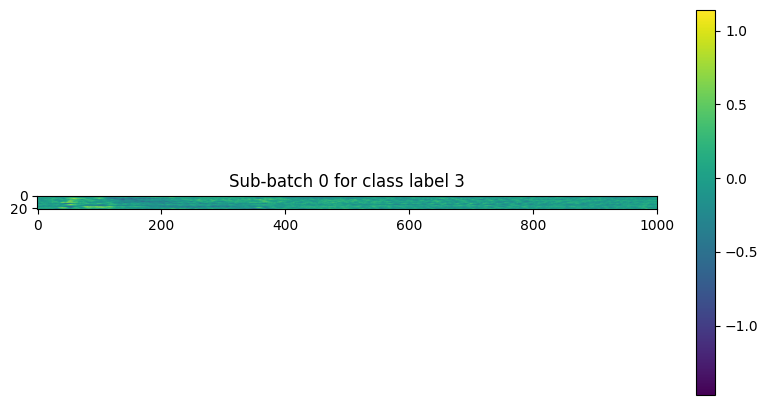

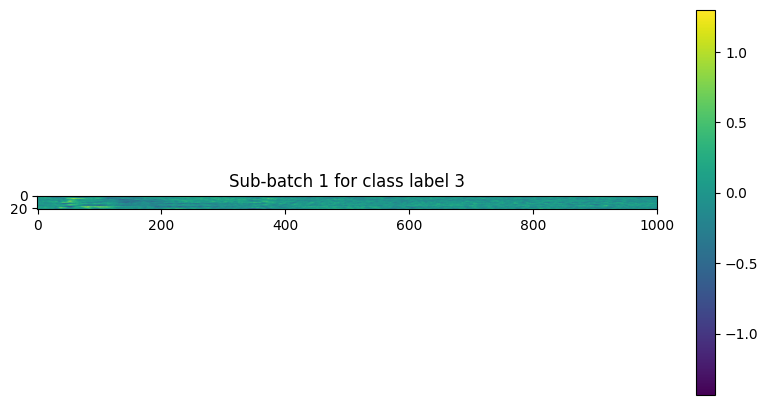

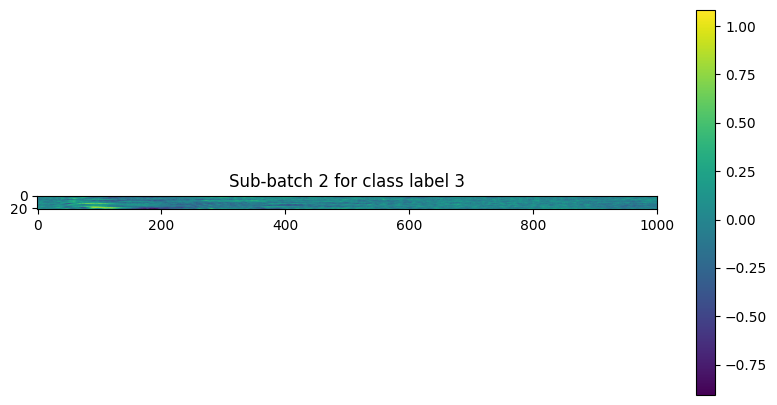

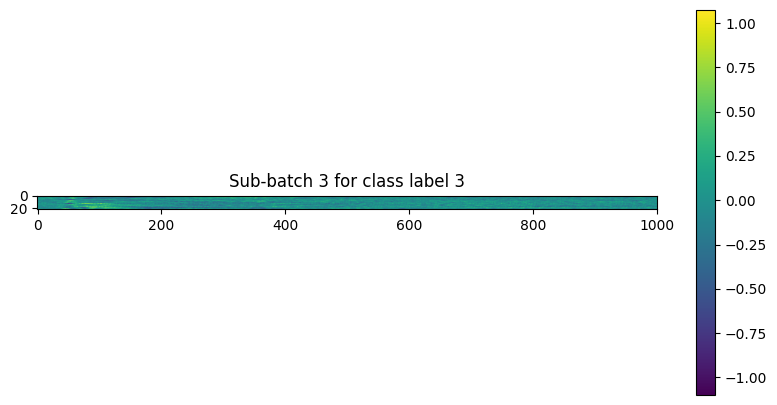

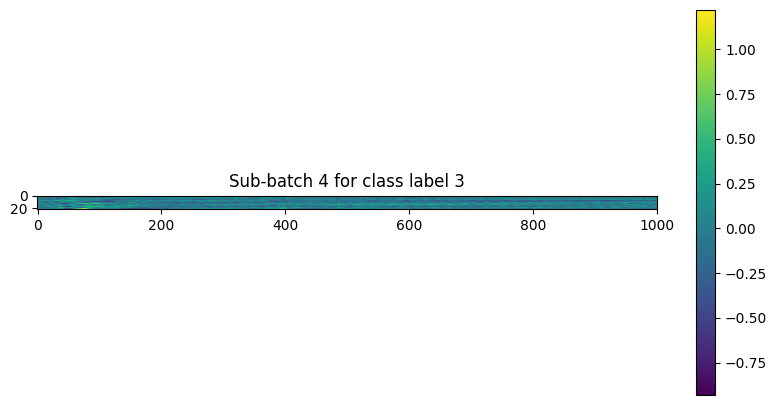

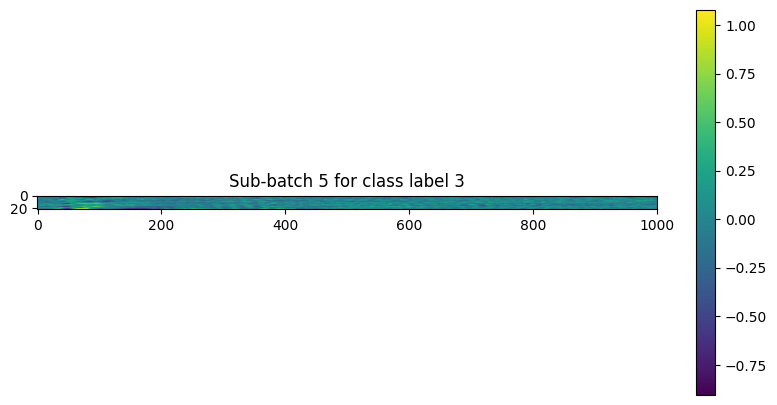

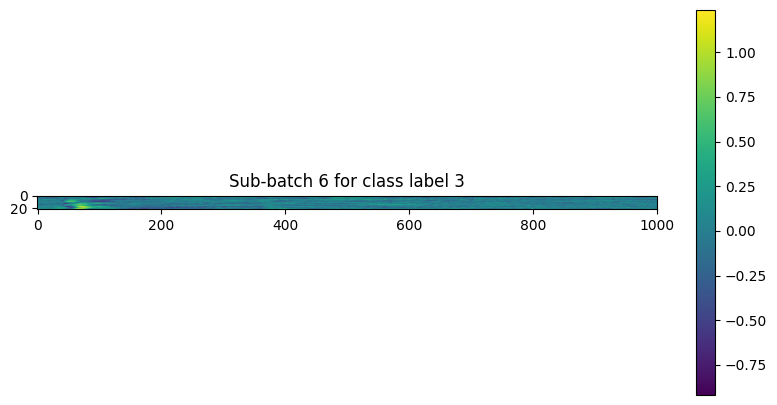

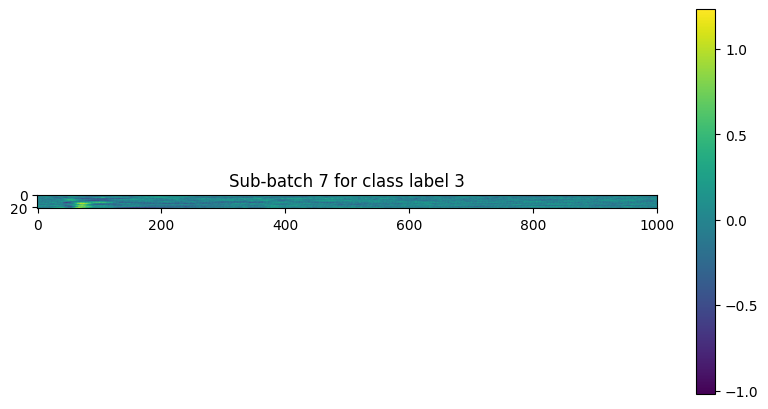

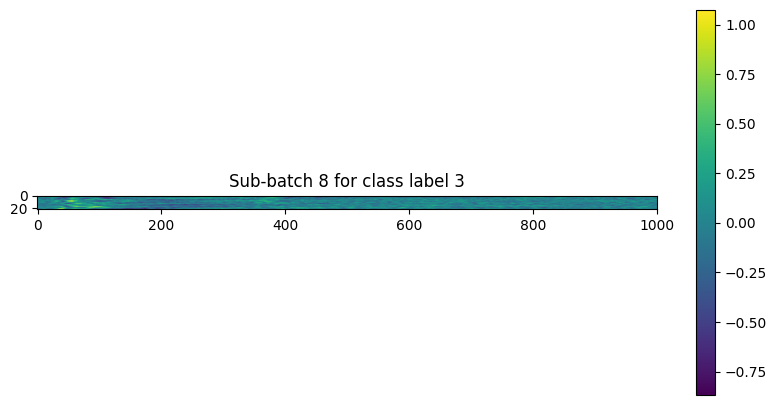

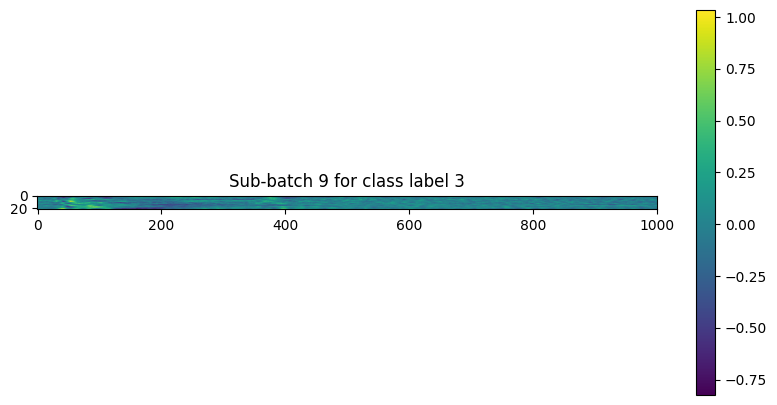

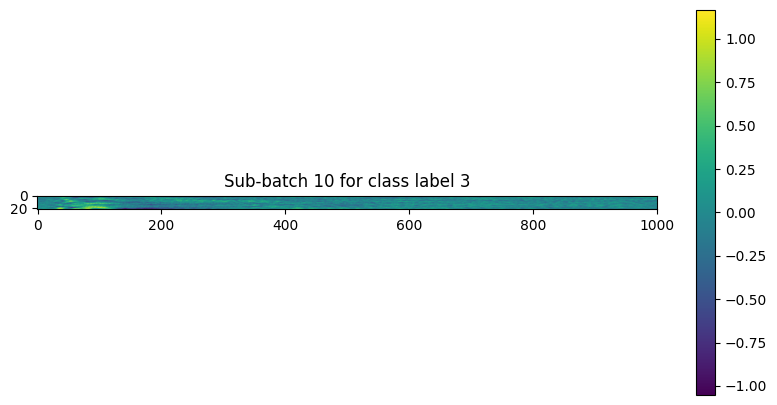

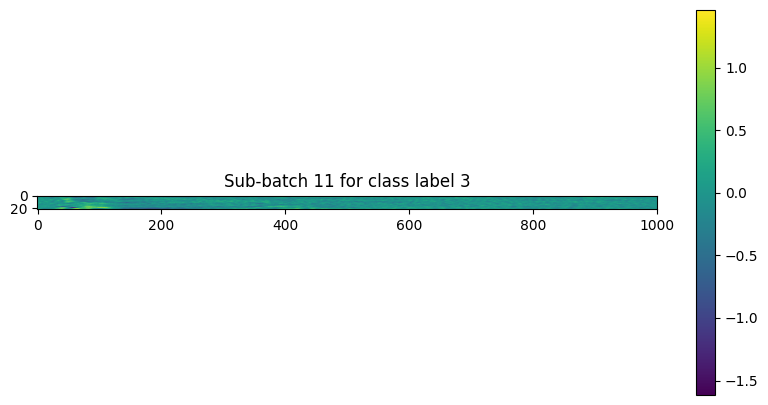

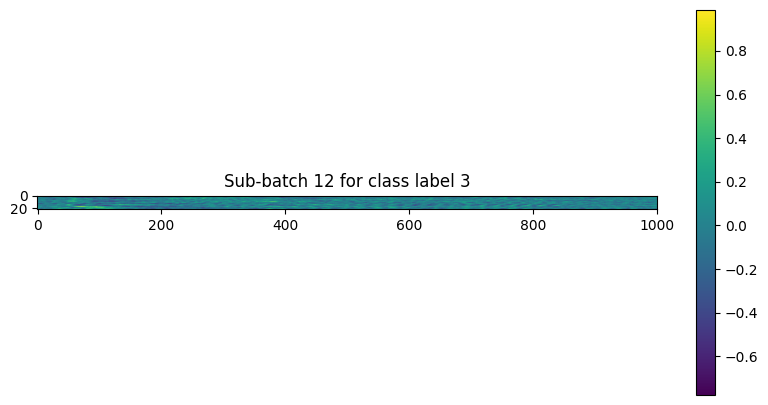

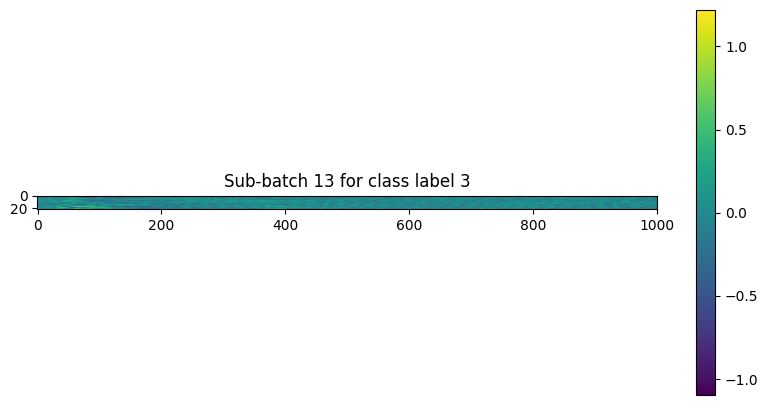

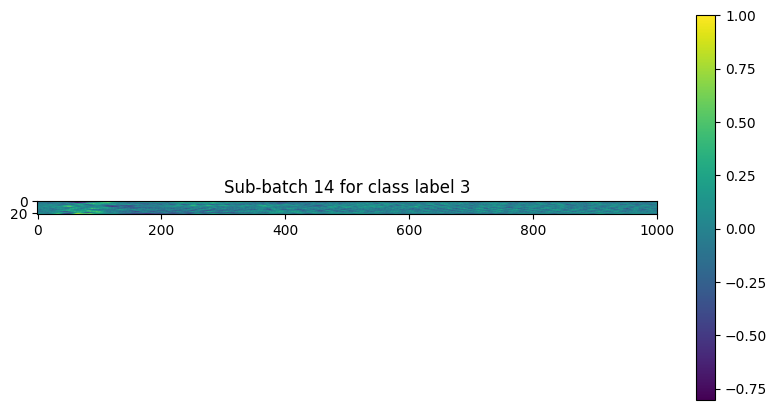

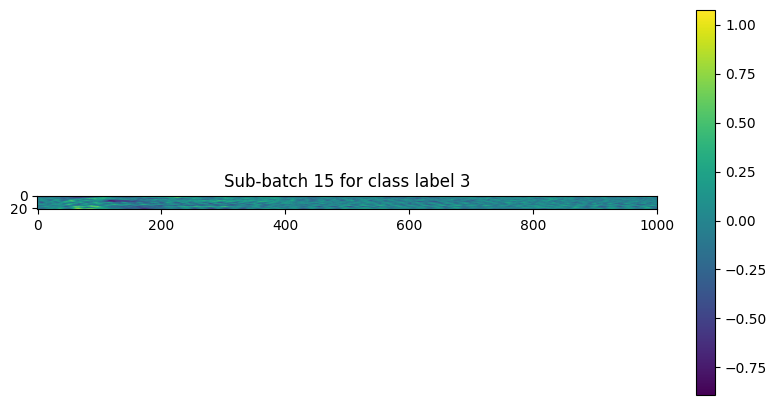

In [44]:
from collections import defaultdict
import torch
import matplotlib.pyplot as plt

# Initialize dictionary to store accumulated sub-batches for each class label
accumulated_sub_batches = defaultdict(list)

# Iterate through each batch
for batch_idx, batch_data in enumerate(train_loader):
    print('batch_idx', batch_idx)
    print('batch_subject', torch.unique(batch_data[2]))
    print('batch_data', torch.unique(batch_data[1]))

    # Separate batch data into sub-batches based on class labels
    class_labels = batch_data[1]
    sub_batches = defaultdict(list)

    for i, label in enumerate(class_labels):
        sub_batches[label.item()].append(batch_data[0][i])

    # Convert lists to tensors and accumulate sub-batches
    for label in sub_batches:
        sub_batches[label] = torch.stack(sub_batches[label])
        accumulated_sub_batches[label].append(sub_batches[label])

# Extract the accumulated sub-batches that correspond to class label 3
if 3 in accumulated_sub_batches:
    sub_batches_label_3 = accumulated_sub_batches[3]

    # Visualize the accumulated sub-batches
    for i, sub_batch in enumerate(sub_batches_label_3):
        plt.figure(figsize=(10, 5))
        plt.title(f'Sub-batch {i} for class label 3')
        plt.imshow(sub_batch.mean(dim=0).numpy(), cmap='viridis')
        plt.colorbar()
        plt.show()
else:
    print("No sub-batches found for class label 3")

In [32]:
from collections import defaultdict
import torch

# Initialize dictionaries to store sum and count of data points for each class label
class_sums = defaultdict(lambda: torch.zeros_like(batch_data[0][0]))
class_counts = defaultdict(int)

# Iterate through each batch
for batch_idx, batch_data in enumerate(train_loader):
    print('batch_idx', batch_idx)
    print('batch_subject', torch.unique(batch_data[2]))
    print('batch_data', torch.unique(batch_data[1]))

    # Separate batch data into sub-batches based on class labels
    class_labels = batch_data[1]
    for i, label in enumerate(class_labels):
        class_sums[label.item()] += batch_data[0][i]
        class_counts[label.item()] += 1

# Compute the mean for each class label
class_means = {label: class_sums[label] / class_counts[label] for label in class_sums}

# Print the mean values for each class label
for label, mean in class_means.items():
    print(f'Class label: {label}, Mean value: {mean}')

batch_idx 0
batch_subject tensor([0])
batch_data tensor([0, 1, 2, 3])
batch_idx 1
batch_subject tensor([0])
batch_data tensor([0, 1, 2, 3])
batch_idx 2
batch_subject tensor([1])
batch_data tensor([0, 1, 2, 3])
batch_idx 3
batch_subject tensor([1])
batch_data tensor([0, 1, 2, 3])
batch_idx 4
batch_subject tensor([2])
batch_data tensor([0, 1, 2, 3])
batch_idx 5
batch_subject tensor([2])
batch_data tensor([0, 1, 2, 3])
batch_idx 6
batch_subject tensor([4])
batch_data tensor([0, 1, 2, 3])
batch_idx 7
batch_subject tensor([4])
batch_data tensor([0, 1, 2, 3])
batch_idx 8
batch_subject tensor([5])
batch_data tensor([0, 1, 2, 3])
batch_idx 9
batch_subject tensor([5])
batch_data tensor([0, 1, 2, 3])
batch_idx 10
batch_subject tensor([6])
batch_data tensor([0, 1, 2, 3])
batch_idx 11
batch_subject tensor([6])
batch_data tensor([0, 1, 2, 3])
batch_idx 12
batch_subject tensor([7])
batch_data tensor([0, 1, 2, 3])
batch_idx 13
batch_subject tensor([7])
batch_data tensor([0, 1, 2, 3])
batch_idx 14
bat

In [31]:
from collections import defaultdict
import torch

# Assuming train_loader is defined and contains your data
for batch_idx, batch_data in enumerate(train_loader):
    print('batch_idx', batch_idx)
    print('batch_subject', torch.unique(batch_data[2]))
    print('batch_data', torch.unique(batch_data[1]))

    # Separate batch data into sub-batches based on subject labels
    subject_labels = batch_data[2]
    subject_batches = defaultdict(lambda: defaultdict(list))

    for i, subject_label in enumerate(subject_labels):
        class_label = batch_data[1][i]
        subject_batches[subject_label.item()][class_label.item()].append(batch_data[0][i])

    # Convert lists to tensors and concatenate sub-batches for each subject label
    final_batches = {}
    for subject_label in subject_batches:
        concatenated_batches = []
        for class_label in subject_batches[subject_label]:
            sub_batch = torch.stack(subject_batches[subject_label][class_label])
            concatenated_batches.append(sub_batch)
        final_batches[subject_label] = torch.cat(concatenated_batches)

    # Print final batches for verification
    for subject_label, final_batch in final_batches.items():
        print(f'Subject label: {subject_label}, Final batch size: {final_batch.size()}')

batch_idx 0
batch_subject tensor([0])
batch_data tensor([0, 1, 2, 3])
Subject label: 0, Final batch size: torch.Size([288, 22, 1001])
batch_idx 1
batch_subject tensor([0])
batch_data tensor([0, 1, 2, 3])
Subject label: 0, Final batch size: torch.Size([288, 22, 1001])
batch_idx 2
batch_subject tensor([1])
batch_data tensor([0, 1, 2, 3])
Subject label: 1, Final batch size: torch.Size([288, 22, 1001])
batch_idx 3
batch_subject tensor([1])
batch_data tensor([0, 1, 2, 3])
Subject label: 1, Final batch size: torch.Size([288, 22, 1001])
batch_idx 4
batch_subject tensor([2])
batch_data tensor([0, 1, 2, 3])
Subject label: 2, Final batch size: torch.Size([288, 22, 1001])
batch_idx 5
batch_subject tensor([2])
batch_data tensor([0, 1, 2, 3])
Subject label: 2, Final batch size: torch.Size([288, 22, 1001])
batch_idx 6
batch_subject tensor([4])
batch_data tensor([0, 1, 2, 3])
Subject label: 4, Final batch size: torch.Size([288, 22, 1001])
batch_idx 7
batch_subject tensor([4])
batch_data tensor([0, 1,

### Compute the Barycenter of all the data

In [ ]:
#Initialise the model
dict_config['params'] = params
dict_config,params_model = correct_dict_1(dict_config,params)
if dict_config['preload_reg']==True:
    params_model = params + [len(Y)]
    
    
    model = instanciate_model(dict_config['model'],params_model)

In [33]:
def align_classes(batch_a, batch_b):
        '''
        Aligns batch class labels to be able to compare domains of classes
        batch_a/batch_b: list of torch.tensors (data, class_labels, subject_labels)

        Returns:
        batch_a_aligned, batch_b_aligned: list of torch.tensors (data, class_labels, subject_labels) where class_labels of a and b are the same.
        '''

        sorted_a = torch.argsort(batch_a[1])
        sorted_b = torch.argsort(batch_b[1])
        batch_a_aligned = [batch_a[0][sorted_a], batch_a[1][sorted_a], batch_a[2][sorted_a]]
        batch_b_aligned = [batch_b[0][sorted_b], batch_b[1][sorted_b], batch_b[2][sorted_b]]

        perm = torch.randperm(len(batch_a[1]))
        batch_a_perm= [batch_a_aligned[0][perm], batch_a_aligned[1][perm], batch_a_aligned[2][perm]]
        batch_b_perm= [batch_b_aligned[0][perm], batch_b_aligned[1][perm], batch_b_aligned[2][perm]]

        return batch_a_perm, batch_b_perm


train_loader_iter = iter(train_loader)
batches = list(train_loader_iter)

for i in range(len(batches) - 2):
    batch_0 = batches[i]
    batch_2 = batches[i + 2]

    batch_0_aligned, batch_2_aligned = align_classes(batch_0, batch_2)

    print(f'Comparing batch {i} and batch {i + 2}')
    print('Difference in classes:', torch.sum(batch_0_aligned[1] != batch_2_aligned[1]))
    print('Subject labels:', torch.unique(batch_0[2]), torch.unique(batch_2[2]))
    print('---')
        


Comparing batch 0 and batch 2
Difference in classes: tensor(0)
Subject labels: tensor([0]) tensor([1])
---
Comparing batch 1 and batch 3
Difference in classes: tensor(0)
Subject labels: tensor([0]) tensor([1])
---
Comparing batch 2 and batch 4
Difference in classes: tensor(0)
Subject labels: tensor([1]) tensor([2])
---
Comparing batch 3 and batch 5
Difference in classes: tensor(0)
Subject labels: tensor([1]) tensor([2])
---
Comparing batch 4 and batch 6
Difference in classes: tensor(0)
Subject labels: tensor([2]) tensor([4])
---
Comparing batch 5 and batch 7
Difference in classes: tensor(0)
Subject labels: tensor([2]) tensor([4])
---
Comparing batch 6 and batch 8
Difference in classes: tensor(0)
Subject labels: tensor([4]) tensor([5])
---
Comparing batch 7 and batch 9
Difference in classes: tensor(0)
Subject labels: tensor([4]) tensor([5])
---
Comparing batch 8 and batch 10
Difference in classes: tensor(0)
Subject labels: tensor([5]) tensor([6])
---
Comparing batch 9 and batch 11
Diffe

## Test wasserstein distance loss


In [34]:
import torch
from models.EEGSimpleConv import EEGSimpleConv
import numpy as np
import random
from geomloss import SamplesLoss

import wandb 

device = 'cuda' if torch.cuda.is_available() else 'cpu'

model = EEGSimpleConv(160,4,70,5,22,4,250)


In [1]:
import torch
from geomloss import SamplesLoss  # See also ImagesLoss, VolumesLoss

# Create some large point clouds in 3D
x = torch.randn(100, 3, requires_grad=True).cuda()
y = torch.randn(200, 3).cuda()

# Define a Sinkhorn (~Wasserstein) loss between sampled measures
loss = SamplesLoss(loss="sinkhorn", p=2, blur=.05)

L = loss(x, y)  # By default, use constant weights = 1/number of samples
g_x, = torch.autograd.grad(L, [x])  # GeomLoss fully supports autograd!

[KeOps] Warning : Cuda libraries were not detected on the system or could not be loaded ; using cpu only mode


In [18]:
data_iter = iter(train_loader)

for batch_idx, batch_curr in enumerate(data_iter):
    
    # Compare batch1 to batch3 and batch2 to batch4
    print('Comparing batches')
    print('batch_idx', batch_idx)
    print('batch_curr', batch_curr[1])

Comparing batches
batch_idx 0
batch_curr tensor([3, 0, 2, 1, 1, 2, 0, 3, 2, 0, 1, 1, 1, 3, 2, 2, 1, 1, 0, 1, 2, 3, 3, 0,
        1, 3, 3, 2, 3, 3, 2, 1, 2, 0, 0, 0, 3, 0, 1, 3, 2, 0, 2, 0, 3, 2, 0, 1,
        1, 1, 3, 2, 1, 0, 1, 0, 2, 3, 1, 0, 0, 1, 0, 2, 3, 3, 3, 0, 1, 3, 2, 3,
        2, 1, 0, 2, 1, 0, 0, 1, 0, 3, 3, 2, 1, 2, 3, 2, 3, 0, 2, 2, 2, 0, 3, 1,
        2, 3, 1, 0, 0, 3, 1, 1, 0, 2, 3, 3, 3, 2, 1, 0, 2, 3, 1, 3, 0, 2, 3, 3,
        1, 2, 2, 0, 3, 2, 1, 1, 3, 2, 1, 0, 2, 2, 0, 1, 3, 0, 0, 0, 0, 1, 2, 1,
        2, 1, 1, 0, 0, 2, 0, 3, 1, 3, 1, 1, 2, 3, 0, 2, 3, 0, 3, 0, 3, 2, 2, 3,
        1, 2, 2, 2, 0, 3, 1, 3, 1, 0, 1, 3, 1, 0, 1, 2, 0, 0, 3, 1, 2, 3, 2, 0,
        0, 1, 3, 2, 3, 1, 1, 0, 0, 2, 3, 2, 2, 1, 2, 3, 3, 2, 2, 2, 2, 3, 3, 0,
        3, 1, 2, 0, 2, 1, 3, 1, 3, 1, 1, 1, 1, 0, 0, 3, 2, 0, 0, 0, 3, 0, 1, 0,
        1, 3, 2, 3, 3, 0, 3, 3, 0, 2, 3, 0, 1, 2, 2, 2, 0, 2, 3, 0, 3, 2, 0, 1,
        3, 1, 0, 3, 1, 0, 1, 2, 2, 1, 3, 1, 3, 0, 0, 1, 0, 2, 2, 1, 0, 1, 2, 1]

In [21]:
input = batch_data[0][0][0]
input.shape[0]
#batch_norm = torch.nn.BatchNorm1d(3)
#input_normalized = batch_norm(input)
#input_normalized,input


1001

In [26]:
import torch
import torch.nn as nn

# Define a custom layer with BatchNorm
class CustomLayer(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(CustomLayer, self).__init__()
        self.batch_norm = nn.BatchNorm1d(output_dim)  # Apply BatchNorm to output features

    def forward(self, x):
        x = self.batch_norm(x)    # Apply BatchNorm
        return x

# Example usage
input_data = torch.randn(10, 5)  # Batch of 10 samples, each with 5 features
layer = CustomLayer(input_dim=5, output_dim=5)

output = layer(input_data)
print("Output Shape:", output.shape)
print('output', output)
print('input', input_data)


Output Shape: torch.Size([10, 5])
output tensor([[-0.8610,  0.7582,  1.2295, -0.7259, -0.2914],
        [ 0.6025,  0.5830, -1.1238, -0.4869, -0.8016],
        [-1.2765,  1.5009, -0.7454, -0.2863, -0.6954],
        [-0.4101, -2.1724, -0.2423,  2.3968, -1.9922],
        [ 1.5743, -1.0058,  0.7302,  0.6021,  0.8089],
        [ 1.4122, -0.4300, -0.1817,  0.7708,  1.5848],
        [-1.2578,  0.3015, -0.9362, -1.0740, -0.3567],
        [-0.2358, -0.5539, -0.2136,  0.2725,  0.5640],
        [ 0.8914,  0.5185, -0.6765, -0.4650,  1.0964],
        [-0.4392,  0.5000,  2.1599, -1.0042,  0.0834]],
       grad_fn=<NativeBatchNormBackward0>)
input tensor([[-1.3044,  0.2933,  0.8366, -0.7400, -0.2320],
        [ 0.4637,  0.1587, -0.9045, -0.5656, -0.7003],
        [-1.8064,  0.8643, -0.6245, -0.4193, -0.6029],
        [-0.7597, -1.9598, -0.2523,  1.5386, -1.7933],
        [ 1.6379, -1.0629,  0.4672,  0.2290,  0.7781],
        [ 1.4420, -0.6202, -0.2075,  0.3521,  1.4905],
        [-1.7839, -0.0578, -0

In [6]:
import torch
from torch.utils.data import DataLoader, TensorDataset

# Example dataset
data = torch.randn(100, 3)  # 100 samples, 3 features each
labels = torch.randint(0, 2, (100,))  # 100 labels (binary classification)

# Create a TensorDataset
dataset = TensorDataset(data, labels)

# Create a DataLoader
dataloader = DataLoader(dataset, batch_size=10, shuffle=True)

# Iterate over the DataLoader
for batch_data, batch_labels in dataloader:
    print("Batch data:", batch_data)
    print("Batch labels:", batch_labels)

Batch data: tensor([[-0.7937, -0.7865,  1.0887],
        [-0.2109,  0.4925, -0.2563],
        [ 0.8570,  1.0815, -0.4006],
        [-0.5012, -0.3917,  1.7267],
        [ 1.5940,  0.1041, -0.6782],
        [ 1.1589,  0.5656,  0.8356],
        [-0.2532,  1.1831,  0.7552],
        [ 1.5578,  0.0066, -1.0327],
        [-0.6860, -0.6093, -0.5870],
        [-0.6943, -0.3133, -1.4610]])
Batch labels: tensor([1, 1, 0, 0, 1, 1, 0, 1, 1, 1])
Batch data: tensor([[-2.1095, -0.4019, -1.7926],
        [-0.6349, -0.0182,  0.7703],
        [-1.0121, -0.8909, -0.2404],
        [-0.1838, -1.1900,  0.2608],
        [ 0.3238,  0.8002, -0.4169],
        [ 0.9614,  0.9133,  0.9691],
        [ 0.6174,  0.0676, -2.0867],
        [ 1.6331,  0.0657,  1.0215],
        [ 1.0043, -0.3438, -0.1344],
        [ 0.3274, -1.2679, -0.6764]])
Batch labels: tensor([0, 1, 0, 0, 0, 0, 1, 0, 0, 0])
Batch data: tensor([[-8.4147e-01,  1.7601e-03,  1.3723e+00],
        [-7.8138e-01,  1.2383e+00, -1.0685e+00],
        [ 7.8584e-

In [10]:
best_params = dict_config['params']

# Cross-Subject on BNCI

In [29]:
from scripts.scripts import *


p          = [109,4,70,8] 
dict_config = { 
'model':'EEGSimpleConv',
'params':p,
'dataset':'BNCI',
'runs':5,
'n_epochs':50,
'EA':True,
'mixup':True,
'BN':True,
'EOG':False,
'Z':'Z0',
'path': data_path,
'lmso':False,
'session':True,
'reg_subject':False,
'use_wandb':True,
'evaluation':'cross',
'comment':'baseline',
'within':False,
'mdl':False,
'filter':0.5,
'save_model':True,
'save_model_path': model_path + '/BNCI_cross_subj',
'load_model':False,
'preload_reg':False,
'online':False
}
    
    
X,Y = load_data(dict_config)
best_params = dict_config['params']
best_score = train_test(best_params,dict_config, X,Y)


Sampling Freq: 250


[109, 4, 70, 8, 22, 4, 250] 2462246 params
Split: 0


/home/nelosegui/.local/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


 50 0.598 0.700 

UnboundLocalError: local variable 'latent' referenced before assignment

# Cross-Subject on BNCI with subject-wise reguralization 

In [27]:
from scripts.scripts import *

p          = [0.2,160,4,70,5]
dict_config = { 
'model':'EEGSimpleConv',
'params':p,
'dataset':'BNCI',
'runs':5,
'n_epochs':50,
'EA':True,
'mixup':True,
'BN':True,
'EOG':False,
'Z':'Z0',
'path':data_path,
'lmso':False,
'session':True,
'reg_subject':True,
'use_wandb':True,
'evaluation':'cross',
'comment':'baseline',
'within':False,
'mdl':False,
'filter':0.5,
'save_model':True,
'save_model_path':'/home/nelosegui/BIFOLD_work/domain_generalisation/conv_eeg/results/BNCI_subj_reg',
'load_model':False,
'preload_reg':False,
'online':False
}    
    
    
X,Y = load_data(dict_config)
best_params = dict_config['params']
best_score = train_test(best_params,dict_config, X,Y)


[autoreload of scripts.scripts failed: Traceback (most recent call last):
  File "/home/nelosegui/.local/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 276, in check
    superreload(m, reload, self.old_objects)
  File "/home/nelosegui/.local/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 475, in superreload
    module = reload(module)
  File "/usr/local/lib/python3.10/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 619, in _exec
  File "<frozen importlib._bootstrap_external>", line 879, in exec_module
  File "<frozen importlib._bootstrap_external>", line 1017, in get_code
  File "<frozen importlib._bootstrap_external>", line 947, in source_to_code
  File "<frozen importlib._bootstrap>", line 241, in _call_with_frames_removed
  File "/home/nelosegui/BIFOLD_work/domain_generalisation/conv_eeg/scripts/scripts.py", line 197
    def train(epoch, model, criterion, optimizer

Sampling Freq: 250


wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: naima-elosegui (naima-elosegui-technische-universitat-berlin). Use `wandb login --relogin` to force relogin


[0.2, 160, 4, 70, 5, 22, 4, 250, 9] 3326677 params
Split: 0


/home/nelosegui/.local/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/home/nelosegui/.local/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


 50 0.452 0.652 

ValueError: too many values to unpack (expected 2)

Test for loading data

In [5]:
X,Y = load_data(dict_config)

Sampling Freq: 250


AssertionError: 

# Within-Subject on BNCI 

In [ ]:
from scripts.scripts import *


p          = [85,1,95,15]
dict_config = { 
'model':'EEGSimpleConv',
'params':p,
'dataset':'BNCI',
'runs':5,
'n_epochs':50,
'EA':True,
'mixup':True,
'BN':True,
'EOG':False,
'Z':'Z0',
'path':'/users/local/simpleconv_datasets',
'lmso':False,
'session':True,
'reg_subject':False,
'use_wandb':False,
'evaluation':'within',
'comment':'baseline',
'within':True,
'mdl':False,
'filter':0.5,
'save_model':True,
'save_model_path':'/nasbrain/y17eloua/models/BNCI_2',
'load_model':False,
'preload_reg':False,
'online':False
}  
    
    
X,Y = load_data(dict_config)
best_params = dict_config['params']
best_score = train_test(best_params,dict_config, X,Y)


In [ ]:
from scripts.scripts import *


p          = [85,1,95,15]
dict_config = { 
'model':'EEGSimpleConv',
'params':p,
'dataset':'BNCI',
'runs':5,
'n_epochs':50,
'EA':True,
'mixup':True,
'BN':True,
'EOG':False,
'Z':'Z0',
'path':'/users/local/simpleconv_datasets',
'lmso':False,
'session':True,
'reg_subject':False,
'use_wandb':False,
'evaluation':'within',
'comment':'baseline',
'within':True,
'mdl':False,
'filter':0.5,
'save_model':False,

'load_model':False,
'preload_reg':False,
'online':False
}  
    
    
X,Y = load_data(dict_config)
best_params = dict_config['params']
best_score = train_test(best_params,dict_config, X,Y)


# Cross-Subject with Fine-Tuning on BNCI

To run the following cell run the second code cell (Cross-Subject on BNCI with subject-wise reguralization first) with the argument save_model = True in its dict_config. It will provide the required pretrained model for each subject and each run.

In [ ]:
from scripts.scripts import *


p          = [160,4,70,5]
dict_config = { 
'model':'EEGSimpleConv',
'params':p,
'dataset':'BNCI',
'runs':5,
'n_epochs':60,
'EA':True,
'mixup':True,
'BN':True,
'EOG':False,
'Z':'Z0',
'path':'/users/local/simpleconv_datasets',
'lmso':False,
'session':True,
'reg_subject':False,
'use_wandb':False,
'evaluation':'cross_finetune',
'comment':'baseline',
'within':True,
'mdl':False,
'filter':0.5,
'save_model':True,
'save_model_path':'/nasbrain/y17eloua/models/BNCI_2',   
'load_model':True,
'load_model_path':'/nasbrain/y17eloua/models/BNCI_2',
'preload_reg':True,
'online':False
}

    
    
    
X,Y = load_data(dict_config)
best_params = dict_config['params']
best_score = train_test(best_params,dict_config, X,Y)
